# python-fdfd Examples

First we need to some 'setup'. It's assumed that this notebook is in the base of the python-fdfd repository. If this is not the case you'll need to adjust the sys.path.insert(0, './') command.

## Setup

In [25]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.insert(0, './')

import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import HTML
from numpy import *

import fdfd
import fdfd.driven
import fdfd.eigen
import fdfd.plot

# I'm using my own stylesheet
plt.style.use(['https://git.io/photons.mplstyle',
               'https://git.io/photons-presentation.mplstyle'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Waveguide mode solve

Here we perform a simple eigenmode solve for a waveguide.

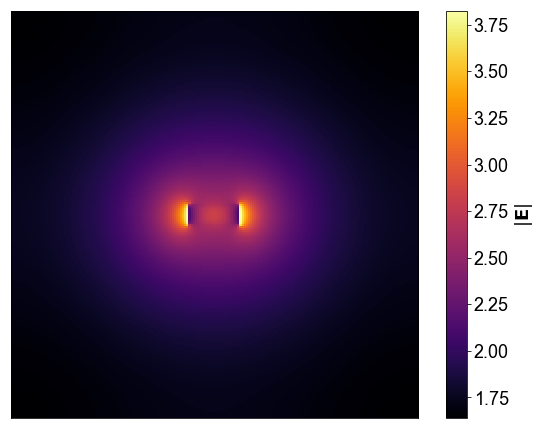

In [4]:
Neigs = 1;
N = (200, 200)
Npml = (0, 0)
xrange = (-2e-6, 2e-6)
yrange = (-2e-6, 2e-6)

omegas = 2*pi*200e12

beta_est = omegas/3e8*3.5;

eps_r = ones(N, dtype=complex)
within_rect1 = lambda x, y: logical_and.reduce((-0.25e-6<x,x<0.25e-6,-0.1e-6<y,y<0.1e-6))
eps_r = fdfd.assign_val(eps_r, within_rect1, 2, xrange, yrange)

(betas, Ex, Ey, Ez, Hx, Hy, Hz) = fdfd.eigen.calculate_beta_2D(omegas, beta_est, Neigs, xrange, yrange, eps_r, Npml)

fdfd.plot.plt_norm(Ex,Ey,Ez)

## Waveguide mode dispersion solve

Here we solve for part of the dispersion relation of the above structure.

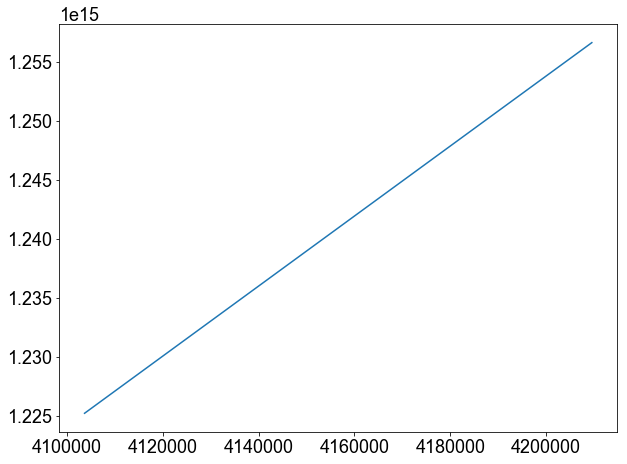

In [6]:
omegas = 2*pi*linspace(195e12, 200e12, 5);
(betas, Ex, Ey, Ez, Hx, Hy, Hz) = fdfd.eigen.calculate_beta_2D(omegas, beta_est, Neigs, xrange, yrange, eps_r, Npml)
plt.plot(real(betas),omegas)

In [22]:
N = (200, 200)
omega = 2*pi*200e12
xrange = (-2e-6, 2e-6)
yrange = (-2e-6, 2e-6)
eps_r = ones(N, dtype=complex)
within_rect1 = lambda x, y: logical_and.reduce((-0.25e-6<x,x<0.25e-6,-0.1e-6<y,y<0.1e-6))
eps_r = fdfd.assign_val(eps_r, within_rect1, 2, xrange, yrange)
Jz = ones(N, dtype=complex)
Jz[N[0]//2,N[1]//2] = 1
Npml = (10, 10)

(Ez,Hx,Hy) = fdfd.driven.solve_TM(omega, xrange, yrange, eps_r, Jz, Npml, matrix_format='csc', timing=False)

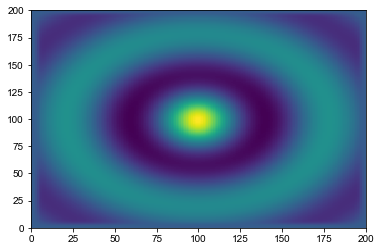

In [24]:
plt.pcolor(real(Ez[0]))

In [19]:
Ez

array([[[-0.+0.00012077j, -0.+0.00012066j, -0.+0.00012044j, ...,
         -0.+0.00012044j, -0.+0.00012066j, -0.+0.00012077j],
        [-0.+0.0001206 j, -0.+0.0001205 j, -0.+0.00012028j, ...,
         -0.+0.00012028j, -0.+0.0001205 j, -0.+0.0001206 j],
        [-0.+0.00012033j, -0.+0.00012023j, -0.+0.00012001j, ...,
         -0.+0.00012001j, -0.+0.00012023j, -0.+0.00012033j],
        ...,
        [-0.+0.0001206 j, -0.+0.0001205 j, -0.+0.00012028j, ...,
         -0.+0.00012028j, -0.+0.0001205 j, -0.+0.0001206 j],
        [-0.+0.00012077j, -0.+0.00012066j, -0.+0.00012044j, ...,
         -0.+0.00012044j, -0.+0.00012066j, -0.+0.00012077j],
        [-0.+0.00012082j, -0.+0.00012071j, -0.+0.0001205 j, ...,
         -0.+0.0001205 j, -0.+0.00012071j, -0.+0.00012082j]]])